## Getting Familiar with Graphs in python

 

### Graph Creation 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import networkx as nx 
import pygraphviz as pgv 
from IPython.display import Image 

In [2]:


# Creating a Graph 
G = nx.Graph() # Right now G is empty

# Add a node
G.add_node(1) 
G.add_nodes_from([2,3]) # You can also add a list of nodes by passing a list argument

# Add edges 
G.add_edge(1,2)

e = (2,3)
G.add_edge(*e) # * unpacks the tuple
G.add_edges_from([(1,2), (1,3)]) # Just like nodes we can add edges from a list

In [ ]:
Image('images/graphclasses.PNG', width = 400)

In [4]:
G.nodes() 

NodeView((1, 2, 3))

In [5]:
G.edges() 

EdgeView([(1, 2), (1, 3), (2, 3)])

In [6]:
G[1] # same as G.adj[1]

AtlasView({2: {}, 3: {}})

In [7]:
G[1][2] 

{}

In [8]:
G.edges[1, 2] 

{}

### Graph Visualization 

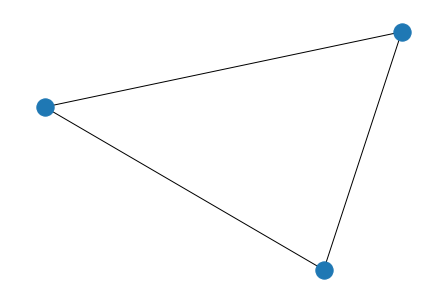

In [9]:
%matplotlib inline 
nx.draw(G)

In [10]:
d={'1': {'2': None}, '2': {'1': None, '3': None}, '3': {'1': None}}
A = pgv.AGraph(data=d)
print(A) # This is the 'string' or simple representation of the Graph

strict graph "" {
	1 -- 2;
	2 -- 3;
	3 -- 1;
}



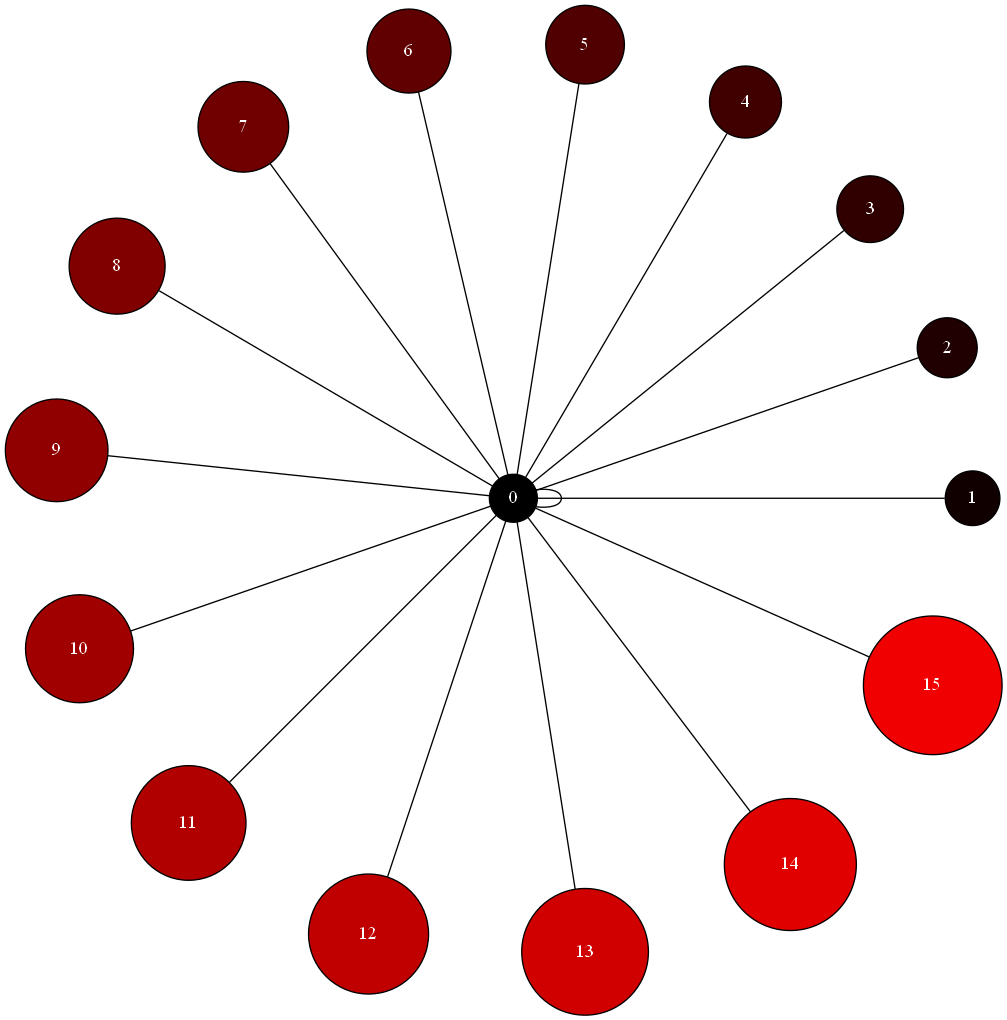

In [17]:
# Let us create another Graph where we can individually control the colour of each node
B = pgv.AGraph()

# Setting node attributes that are common for all nodes 
B.node_attr['style'] = 'filled'
B.node_attr['shape'] = 'circle'
B.node_attr['fixedsize'] = 'true'
B.node_attr['fontcolor'] = '#FFFFFF'

# Creating and setting node attributes that vary for each node (using a for loop)
for i in range(16):
 B.add_edge(0,i)
 n=B.get_node(i)
 n.attr['fillcolor'] = "#%2x0000"%(i*16)
 n.attr['height'] = "%s"%(i/16.0+0.5)
 n.attr['width'] = "%s"%(i/16.0+0.5)
B.draw('star.png', prog="circo") # This creates a .png file in the local directory. Displayed below.

Image('star.png', width=300) # The Graph visualization we created above. 

## Analysis on a Dataset 

In [ ]:
data = pd.read_csv('data/Airlines.csv')

In [ ]:
data.shape

In [ ]:
data.dtypes

In [ ]:
# converting sched_dep_time to 'std' - Scheduled time of departure
data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

In [ ]:
# converting sched_arr_time to 'sta' - Scheduled time of arrival
data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

# converting dep_time to 'atd' - Actual time of departure
data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

In [ ]:
# converting arr_time to 'ata' - Actual time of arrival
data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

In [ ]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

In [ ]:
# finally we drop the columns we don't need
data = data.drop(columns = ['year', 'month', 'day'])

In [ ]:
FG = nx.from_pandas_edgelist(data, source='origin', target='dest', edge_attr=True,)

FG.nodes()

In [ ]:
FG.edges()

In [ ]:
nx.draw_networkx(FG, with_labels=True) # Quick view of the Graph. As expected we see 3 very busy airports

In [ ]:
nx.algorithms.degree_centrality(FG) # Notice the 3 airports from which all of our 100 rows of data originates
nx.density(FG) # Average edge density of the Graphs

In [ ]:
nx.average_shortest_path_length(FG) # Average shortest path length for ALL paths in the Graph

In [ ]:
nx.average_degree_connectivity(FG) # For a node of degree k - What is the average of its neighbours' degree?

In [ ]:
# Let us find all the paths available
for path in nx.all_simple_paths(FG, source='JAX', target='DFW'):
 print(path)

In [ ]:
# Let us find the dijkstra path from JAX to DFW.
# You can read more in-depth on how dijkstra works from this resource - https://courses.csail.mit.edu/6.006/fall11/lectures/lecture16.pdf
dijpath = nx.dijkstra_path(FG, source='JAX', target='DFW')
dijpath

In [ ]:
# Let us try to find the dijkstra path weighted by airtime (approximate case)
shortpath = nx.dijkstra_path(FG, source='JAX', target='DFW', weight='air_time')
shortpath